In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
g0 = 9.81

T_C = 28 + 273.15
D = 0.25

r_a = 1.12
r_V = 0.21
r_T = 0.060

T_H = T_C / (1-r_T)  # hot temperature
H = D*r_a  # height

rho0_oil = 1080  # density at room temp
rho0_ss = 1074  # density of ss
c_oil = 1591
c_ss = 3993

V_tot = np.pi * (D/2)**2 * H
m = (V_tot * r_V/(1+r_V)) * rho0_oil

In [4]:
# thermo constants
eta = 1.08e-3  # viscosity of ss (Pa s)
b = 1
h = 100  # heat transfer coefficient

In [5]:
def rho_oil(T):
    return 958.766 + 1.31955 * T - 0.00307241*T*T

def rho_ss(T):
    return 745.901 + 2.39312 * T - 0.00434063*T*T

In [6]:
def T(x):
    return x/H * (T_C-T_H) + T_H

In [7]:
def f(t, y):
    rho = rho_oil(y[2])
    r = ((3*m/rho)/(4*np.pi))**(1.0/3)
#     print(f'm: {m}')
#     print(f'rho: {rho}')
#     print(f'T: {y[2]}')
#     print(f'r: {r}')
    dx = -g0 + rho_ss(T(y[0]))/rho * g0 - 6*np.pi*eta*r*y[1]
    dT = (h*(4*np.pi*r**2)*(T(y[0])-y[2])**b) / (c_oil*m)
    
    if (y[0] >= H):
        y[1] = min(0, y[1])
        
    if (y[0] <= 0):
        y[1] = max(0, y[1])
        
    return [y[1], dx, dT]

In [17]:
t_eval = np.linspace(0, 5000, 10000)
t_span = (t_eval[0], t_eval[-1])
y0 = [0, 0, T_C]

In [18]:
sol = solve_ivp(f, t_span, y0)

<IPython.core.display.Javascript object>


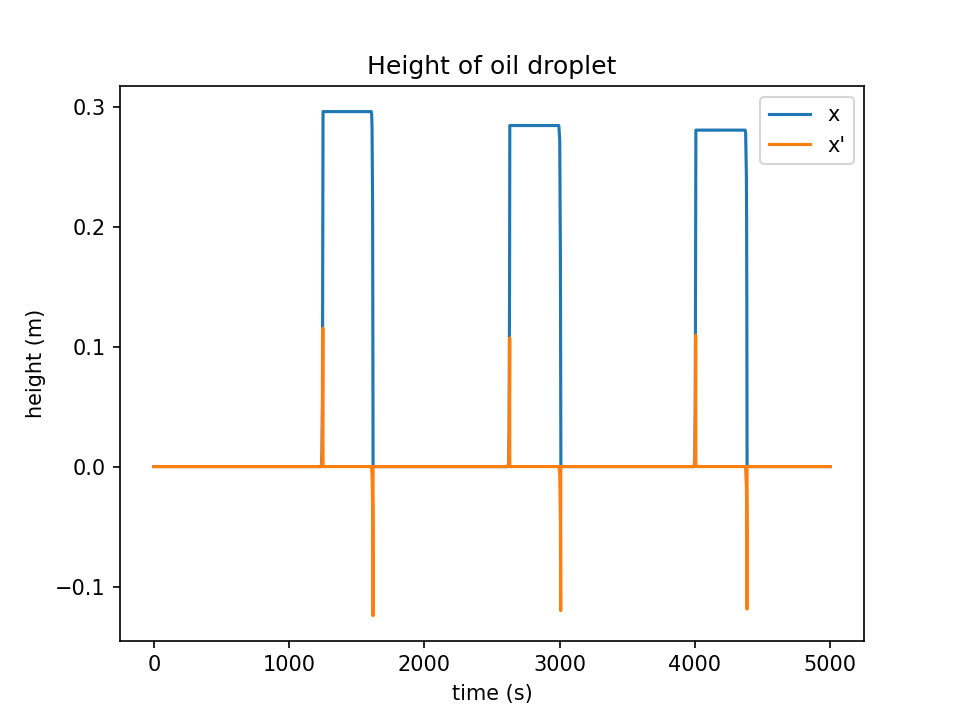

In [22]:
plt.figure()
plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='x\'')
plt.title('Height of oil droplet')
plt.ylabel('height (m)')
plt.xlabel('time (s)')
plt.legend()

<IPython.core.display.Javascript object>


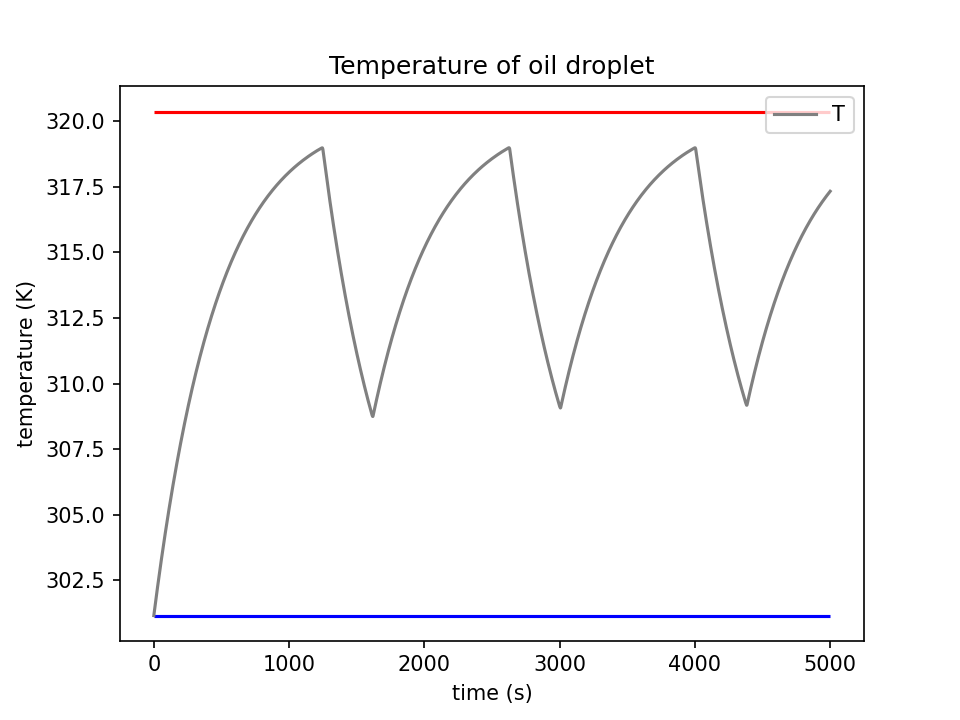

In [23]:
plt.figure()
# plt.plot(sol.t, sol.y[0], label='x')
# plt.plot(sol.t, sol.y[1], label='dx')
plt.plot(sol.t, sol.y[2], label='T', c='gray')
plt.hlines(T_C, t_span[0], t_span[1], colors='blue')
plt.hlines(T_H, t_span[0], t_span[1], colors='red')
plt.title('Temperature of oil droplet')
plt.ylabel('temperature (K)')
plt.xlabel('time (s)')
plt.legend()

In [106]:
t_eval

array([0.00000e+00, 1.00001e-02, 2.00002e-02, ..., 9.99980e+02,
       9.99990e+02, 1.00000e+03])